In [1]:
#Pregnancies : 임신 횟수
#Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
#BloodPressure : 이완기 혈압 (mm Hg)
#SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
#Insulin : 2시간 혈청 인슐린 (mu U / ml)
#BMI : 체질량 지수 (체중kg / 키(m)^2)
#DiabetesPedigreeFunction : 당뇨병 혈통 기능
#Age : 나이
#Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# 구버전 주비터 노트북에서는 시각화를 보기 위해서 #matplotlib inline이 필요함


In [13]:
# data load
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [14]:
df.head()
# 숫자가 아닌 다른 값이 있다면 (결측치가 있다면) 데이터 전처리가 필요하지 않음


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.shape[0]
#768
df.shape[1]
# 데이터를 학습세트와 test세트로 나눠줘야함! 
# [0]으로 인덱싱하면 앞자리인 df의 행의 갯수를 출력 / int로 하여야 정수로 떨어지기에..
split_count = int(df.shape[0] * 0.8)

In [20]:
train = df[:split_count].copy()
# 1~ 614번째까지 넣어줌!
train.shape

(614, 9)

In [24]:
test = df[split_count:].copy()
# 614~ 끝까지를 넣어줌!
test.shape

(154, 9)

In [31]:
feature_names= train.columns[:-1].tolist()
#여러개이기 때문에 리스트로 변경하여 저장해줌!
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [33]:
label_name = train.columns[-1]
#정답값인 outcome이며, 1개이기에 string 형태로 넣어줌!
label_name

'Outcome'

In [36]:
# 학습세트 만들기
X_train = train[feature_names]
print(X_train.shape)
# outcome을 뺸 column이기에 8로 나와야함!
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [37]:
y_train = train[label_name]
print(y_train.shape)
# outcome만 들어있기에 (x, )=> 형태로 나옴
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [38]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [39]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

In [123]:
# 머신러닝 알고리즘 !
from sklearn.tree import DecisionTreeClassifier # 디시전트리는 스무고개 같은 아이

model = DecisionTreeClassifier(random_state=1000)
# random state에 따라 값이 달라짐!
model

DecisionTreeClassifier(random_state=1000)

In [124]:
#학습
model.fit(X_train, y_train)
# 위에서 만든 훈련데이터와 테스트 데이터를 모델에 전달하여 학습시킴

DecisionTreeClassifier(random_state=1000)

In [125]:
#예측
y_predict = model.predict(X_test) 
# 예측은 y의 정답값을 넣지않고 훈련데이터만 넣어줌!
print(y_predict)
y_predict[:5]

[1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0
 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1
 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1
 0 0 0 0 1 0]


array([1, 0, 1, 0, 1], dtype=int64)

[Text(190.72593208092488, 211.04470588235293, 'Glucose <= 154.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(62.71452312138729, 198.25411764705882, 'BMI <= 26.35\ngini = 0.385\nsamples = 518\nvalue = [383, 135]'),
 Text(12.385664739884394, 185.4635294117647, 'Glucose <= 124.5\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(6.192832369942197, 172.6729411764706, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.019\nsamples = 105\nvalue = [104, 1]'),
 Text(3.0964161849710985, 159.88235294117646, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(9.289248554913296, 159.88235294117646, 'DiabetesPedigreeFunction <= 0.705\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(6.192832369942197, 147.09176470588235, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(12.385664739884394, 147.09176470588235, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(18.578497109826593, 172.6729411764706, 'BMI <= 9.8\ngini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(15.482080924855492,

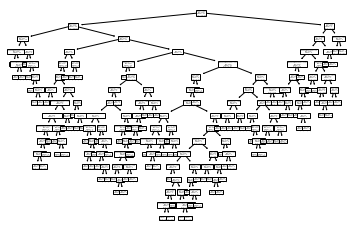

In [126]:
# 트리 알고리즘 분석
from sklearn.tree import plot_tree # 플롯트리를 가져옴

plot_tree(model, feature_names=feature_names)
# 위에서 사용된 model과 feature_names를 이용함

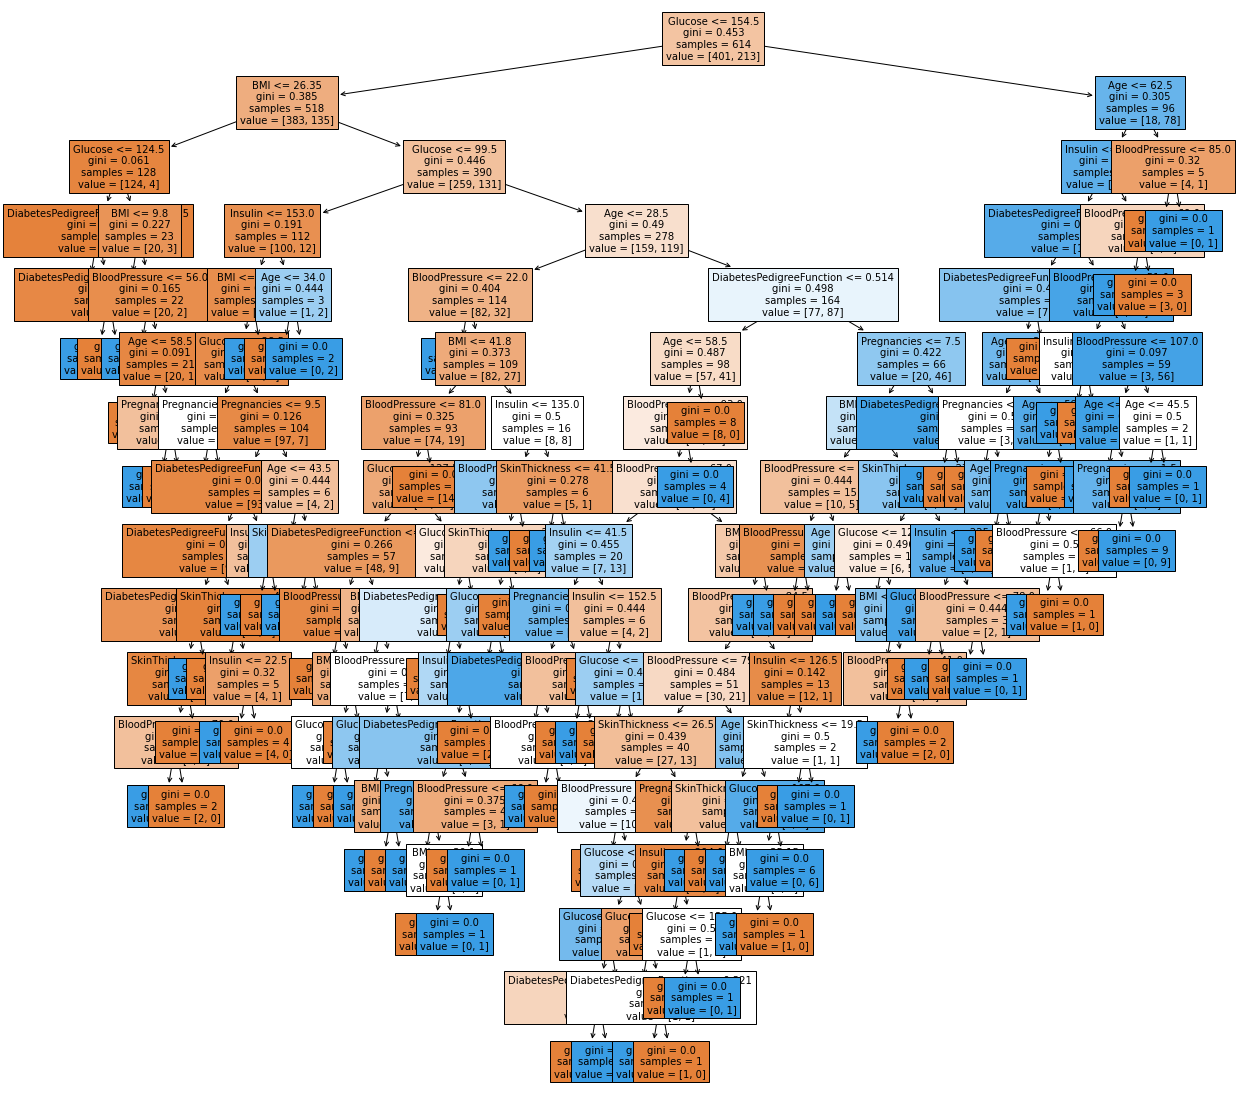

In [127]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names=feature_names,
                           filled=True, 
                           fontsize=10)

# gini가 0이면 맞는 지 아닌 지 확인시켜줌

In [128]:
# import graphviz
# from sklearn.tree import export_graphviz

# dot_tree = export_graphviz(model, feature_names = feature_names,
# filled=True)
# graphviz.Source(dot_tree)

In [129]:
#피쳐 중요도 추출
model.feature_importances_

array([0.06329405, 0.32829965, 0.15944368, 0.04696187, 0.06671195,
       0.1329755 , 0.09943618, 0.10287712])

<AxesSubplot:>

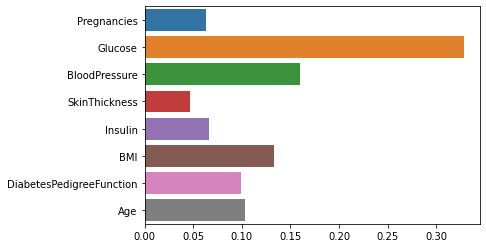

In [130]:
#피처의 중요도 시각화
sns.barplot(x=model.feature_importances_, y=feature_names)

In [131]:
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 되옵니다.
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.
diff_count = abs(y_test - y_predict).sum()
diff_count
# y.test - y_predict에서 절대값을 한 것이 1이 나온다면 (-1 or 1) 다르게 예측된 값임.. => 그것을 다 더해준 것이 44개라는 것은
# 4x개가 다르게 나왔다는 것임! => x_tsst를 통해 예측한 값과 154개의 테스트 된 값이

40

In [132]:
abs(y_test - y_predict).sum() / len(y_test)

(len(y_test) - diff_count) / len(y_test) * 100 # 100점 만점으로 하여 몇개를 정확하게 만들어주었다.

74.02597402597402

In [133]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7402597402597403

In [134]:
model.score(X_test, y_test) * 100

74.02597402597402